## Step 1: Importing Required Modules

In [2]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



## Step 2: importing Data

In [3]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv(r'D:\DATA SET\headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
print(df['Head Size(cm^3)'])
print(df['Brain Weight(grams)'])

0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head Size(cm^3), Length: 237, dtype: int64
0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: Brain Weight(grams), Length: 237, dtype: int64


## Collecting X and Y

In [5]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [6]:
# finding mean of X & y
mean_X = np.mean(X)
mean_y = np.mean(y)

In [7]:
# Total number of values
n = len(X)
n

237

In [8]:
# Calculating the value of b1 & b2 using Formula
num = 0
den = 0

for i in range(n):
    num = num + (X[i] - mean_X ) * (y[i] - mean_y)
    den = den + (X[i] - mean_X ) **2
    
b1 = num / den
b0 = mean_y - ( b1 * mean_X )

# print b1 & b0
print(b1,b0)

0.26342933948939945 325.57342104944223


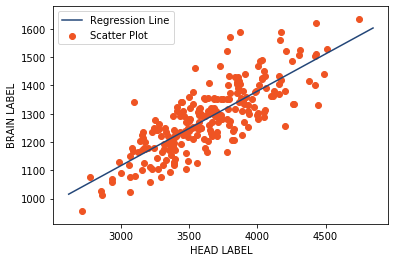

In [9]:
# PLotting Values & Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values of x & y
X1 = np.linspace(min_x, max_x, 1000)
y1 = b0 + b1*X1

# finding mean of X & y
mean_X = np.mean(X)
mean_y = np.mean(y)


# Plot Line
plt.plot(X1, y1,color='#234678', label = 'Regression Line')

# Plotting Scatter Points
plt.scatter(X, y , color = '#ef5423', label = 'Scatter Plot')

plt.xlabel('HEAD LABEL')
plt.ylabel('BRAIN LABEL')
plt.legend()
plt.show()



In [10]:
ss_t = 0
ss_r =0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2

r2 = 1 - (ss_r/ ss_t )
print(r2)

0.6393117199570003


In [12]:
# LINEAR REGRESSION BY SCIKIT LEARN

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Can't use Rank 1 Matrix in package
X = X.reshape(n,1)


# Creating Model
reg = LinearRegression()

# Fitting Training Data 
reg = reg.fit(X,y)


# Y Prediction
y_pred = reg.predict(X)



# Calculate RMSE and R Square
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X,y)
print(r2_score)

0.639311719957
